In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe

tfe.enable_eager_execution()

In [2]:
%%bash
ls ./data

AO
background
costume1.png
costume2.png
image
pants
shirt
simulant_20180307175322622398.png
simulant_20180307175330973242.png
skin


In [3]:
im_path = './data/simulant_20180307175322622398.png'

In [4]:
np.fromfile(im_path, dtype=np.uint8)

array([137,  80,  78, ...,  66,  96, 130], dtype=uint8)

In [7]:
image_file = np.fromfile(im_path, dtype=np.uint8).tobytes()

# Decode the image as a PNG file, this will turn it into a Tensor which we can
# then use in training.
image = tf.image.decode_png(image_file)

In [8]:
%matplotlib inline

(475, 633, 4)


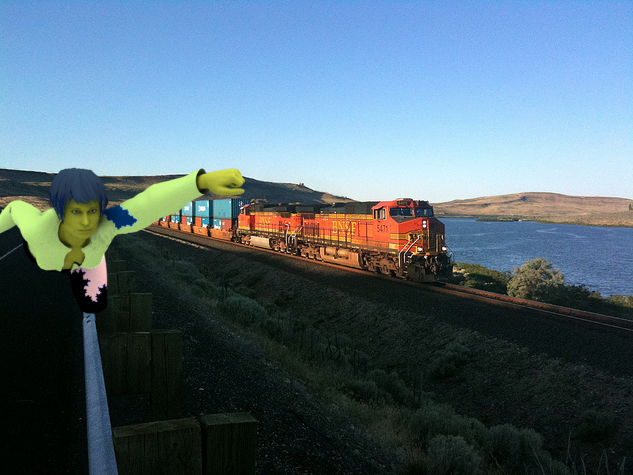

In [9]:
import IPython.display
import PIL.Image

def imshow(tensor):
    IPython.display.display(PIL.Image.fromarray(np.asarray(tensor)))
    
print(image.shape)
imshow(image)

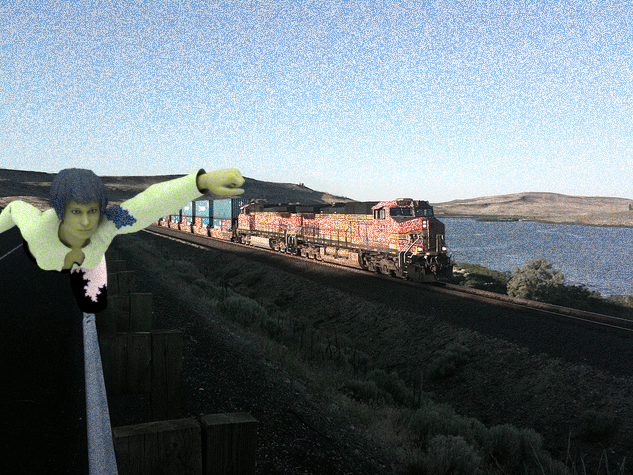

In [11]:
def show(f, i):
    im = tf.cast(f(tf.to_float(i)), tf.uint8)
    imshow(im)
    

def noise_channel(image):
    noise = tf.random_uniform(image.shape, minval=0, maxval=1, dtype=tf.float32)
    noise = noise[:, :, 0]
    
    return noise


def hsv_noise(image):
    # make sure image is correctly formatted
    image = image[:, :, 0:3]
    image = tf.image.convert_image_dtype(image, tf.float32)
    
    # Convert to HSV
    im_hsv = tf.image.rgb_to_hsv(image)
    im_h = im_hsv[:, :, 0]
    im_s = im_hsv[:, :, 1]
    im_v = im_hsv[:, :, 2]
    
    # Multiply noise into Saturation channel
    noise = noise_channel(image)
    im_s = im_s * noise
    
    # Recombine channels
    new_im_hsv = tf.stack([im_h, im_s, im_v], axis=2)
    
    return tf.image.hsv_to_rgb(new_im_hsv)


show(hsv_noise, image)

In [14]:
def noise_channel(image):
    noise = tf.random_normal(image.shape, mean=0.5, stddev=0.1, dtype=tf.float32)
    noise = noise[:, :, 0]
    
    return noise

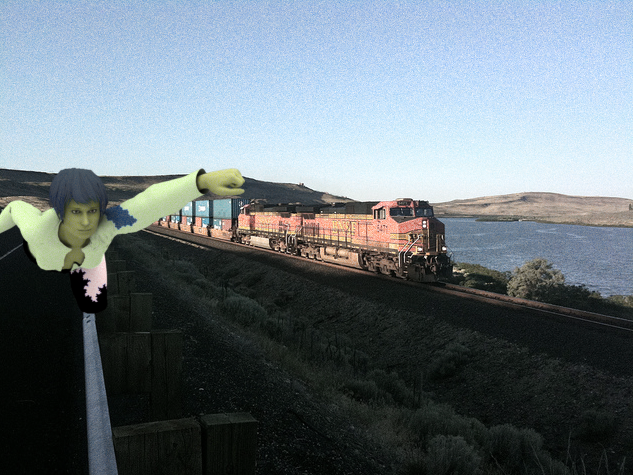

In [16]:
show(hsv_noise, image)